In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/Diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(752, 9)

In [ ]:
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

In [ ]:
y.value_counts()

0    460
1    292
Name: Outcome, dtype: int64

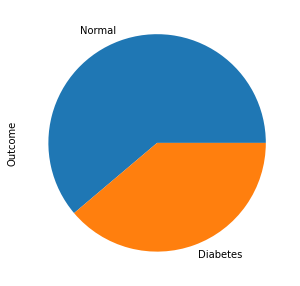

In [ ]:
df["Outcome"].value_counts().plot.pie(labels=["Normal", "Diabetes"], figsize=(5,5));

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (564, 8)
X_test (188, 8)
y_train (564,)
y_test (188,)


In [ ]:
model = Sequential()

model.add(Dense(32, input_dim=8 ,kernel_initializer="uniform", activation="relu"))

model.add(Dense(16, kernel_initializer="uniform", activation="relu"))

model.add(Dense(8, kernel_initializer="uniform", activation="relu"))

model.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))

In [ ]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"] )

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
18/18 [==============================] - 1s 4ms/step - loss: 0.6914 - accuracy: 0.6117
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.6135
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6786 - accuracy: 0.6135
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6752 - accuracy: 0.6135
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6720 - accuracy: 0.6135
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6683 - accuracy: 0.6135
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6653 - accuracy: 0.6135
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6586 - accuracy: 0.6135
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6545 - accuracy: 0.6135
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6507 - accuracy: 0.6135
Epoch 11/

In [ ]:
M = model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.6110 - accuracy: 0.7128


In [ ]:
###############################################################################################

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Data/hcv-2020cs.csv')
df2.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0


In [ ]:
df2.shape

(615, 13)

In [ ]:
df2.iloc[600:615,]

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
600,59,1,27.0,73.8,4.0,65.2,209.0,2.47,3.61,71.7,28.5,60.6,4
601,59,1,31.0,86.3,5.4,95.4,117.0,1.57,3.51,60.5,53.6,68.5,4
602,61,1,39.0,102.9,27.3,143.2,15.0,5.38,4.88,72.3,400.3,73.4,4
603,65,1,NaN,NaN,40.0,54.0,13.0,7.50,NaN,70.0,107.0,79.0,4
604,74,1,23.0,34.1,2.1,90.4,22.0,2.50,3.29,51.0,46.8,57.1,4
605,42,2,33.0,79.0,3.7,55.7,200.0,1.72,5.16,89.1,146.3,69.9,4
606,49,2,33.0,190.7,1.2,36.3,7.0,6.92,3.82,485.9,112.0,58.5,4
607,52,2,39.0,37.0,1.3,30.4,21.0,6.33,3.78,158.2,142.5,82.7,4
608,58,2,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6,4
609,59,2,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5,4


In [ ]:
df2.isna().sum()

Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
Category     0
dtype: int64

In [ ]:
df2.fillna(df2.mean(), inplace=True)

In [ ]:
X = df2.iloc[:, 0:12].astype(float)
y = df2.iloc[:, 12]

In [ ]:
y.value_counts() 0 0 0 1 0

0    533
4     30
2     24
3     21
1      7
Name: Category, dtype: int64

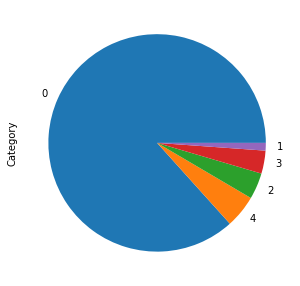

In [ ]:
df2["Category"].value_counts().plot.pie(figsize=(5,5));

In [ ]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
dummy_Y = np_utils.to_categorical(encoded_Y)
dummy_Y.astype(int)

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, dummy_Y, test_size = 0.30, random_state = 0)

In [ ]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (430, 12)
X_test (185, 12)
y_train (430, 5)
y_test (185, 5)


In [ ]:
model2 = Sequential()

model2.add(Dense(64, input_dim=12 ,kernel_initializer="uniform", activation="relu"))

model2.add(Dense(32, kernel_initializer="uniform", activation="relu"))

model2.add(Dense(16, kernel_initializer="uniform", activation="relu"))

model2.add(Dense(16, kernel_initializer="uniform", activation="relu"))

model2.add(Dense(5, kernel_initializer="uniform", activation="softmax"))

In [ ]:
model2.compile(loss = "categorical_crossentropy", optimizer="adam", metrics=["accuracy"] )

In [ ]:
model2.summary()

In [ ]:
history = model2.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 1.5850 - accuracy: 0.8651
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 1.3589 - accuracy: 0.8674
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.7120 - accuracy: 0.8674
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6010 - accuracy: 0.8674
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5117 - accuracy: 0.8674
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4270 - accuracy: 0.8674
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3799 - accuracy: 0.8837
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8930
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.3354 - accuracy: 0.8930
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.8977
Epoch 11/

In [ ]:
M = model2.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.2393 - accuracy: 0.9135


In [ ]:
#########################################################################################################

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Data/healthcare-dataset-stroke-data.csv')
df3.head()

In [ ]:
df3.shape

In [ ]:
df3.isna().sum()

In [ ]:
df3.fillna(df3.mean(), inplace=True)

In [ ]:
df3 = df3.drop(['id'], axis=1)
df3

In [ ]:
X = df3.iloc[:, 0:10]
y = df3.iloc[:, 10]

In [ ]:
y.value_counts()

In [ ]:
df3["stroke"].value_counts().plot.pie(figsize=(5,5));

In [ ]:
X['gender'].value_counts()

In [ ]:
X['hypertension'].value_counts()

In [ ]:
X['heart_disease'].value_counts()

In [ ]:
X['ever_married'].value_counts()

In [ ]:
X['work_type'].value_counts()

In [ ]:
X['Residence_type'].value_counts()

In [ ]:
X['avg_glucose_level'].value_counts()

In [ ]:
X['bmi'].value_counts()

In [ ]:
X['smoking_status'].value_counts()

In [ ]:
X['gender'] = X['gender'].replace('Female', 1)
X['gender'] = X['gender'].replace('Male' , 2)
X['gender'] = X['gender'].replace('Other' , 3)

In [ ]:
X['ever_married'] = X['ever_married'].replace('Yes', 1)
X['ever_married'] = X['ever_married'].replace('No', 0)

In [ ]:
X['work_type'] = X['work_type'].replace('Private', 1)
X['work_type'] = X['work_type'].replace('Self-employed', 2)
X['work_type'] = X['work_type'].replace('children', 3)
X['work_type'] = X['work_type'].replace('Govt_job', 4)
X['work_type'] = X['work_type'].replace('Never_worked', 5)

In [ ]:
X['Residence_type'] = X['Residence_type'].replace('Urban', 1)
X['Residence_type'] = X['Residence_type'].replace('Rural', 2)

In [ ]:
X['smoking_status'] = X['smoking_status'].replace('never smoked', 1)
X['smoking_status'] = X['smoking_status'].replace('Unknown', 2)
X['smoking_status'] = X['smoking_status'].replace('formerly smoked', 3)
X['smoking_status'] = X['smoking_status'].replace('smokes', 4)

In [ ]:
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

In [ ]:
model3 = Sequential()

model3.add(Dense(128, input_dim=10 ,kernel_initializer="uniform", activation="relu"))

model3.add(Dense(64, kernel_initializer="uniform", activation="relu"))

model3.add(Dense(64, kernel_initializer="uniform", activation="relu"))

model3.add(Dense(32, kernel_initializer="uniform", activation="relu"))

model3.add(Dense(8, kernel_initializer="uniform", activation="relu"))

model3.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))

In [ ]:
model3.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"] )

In [ ]:
model3.summary()

In [ ]:
history = model3.fit(X_train, y_train, epochs=100, batch_size=32)

In [ ]:
M = model3.evaluate(X_test, y_test)